# imported a face mask data set for same cnn network and checked accuracy(Plotted graph)




In [1]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import *
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
import os,cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.callbacks import ModelCheckpoint


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:

		 

import os
import numpy as np
directory = '/content/gdrive/MyDrive/Colab Notebooks/dataset/with_mask/'
count = 0
from PIL import Image
train_images = []
train_labels = []
for filename in os.listdir(directory):
 
    if filename.endswith(".png") or filename.endswith(".jpg"):
      img = Image.open(directory + filename)
       
      newsize = (224, 224) 
      img = img.resize(newsize)
      img_arr = np.array(img)        
      #print(img_arr.shape)
      train_images.append(img_arr)

      train_labels.append(0)
      count+=1

directory = '/content/gdrive/MyDrive/Colab Notebooks/dataset/without_mask/'

for filename in os.listdir(directory) or filename.endswith(".jpg"):
  
    if filename.endswith(".png"):
      img = Image.open(directory + filename)      
      newsize = (224, 224)
      img = img.resize(newsize)
      img_arr = np.array(img)
      #print(img_arr.shape)        
      train_images.append(img_arr)
     
      train_labels.append(1)
      count+=1


In [4]:
for image in train_images:
  print(image.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 

In [5]:
print(count)

1824


In [6]:
print(len(train_images)) #to check the lenght of the list with elements having different shape
count =0
for item in train_images:
  if item.shape!=(224,224,3):
    train_images.remove(item)
    train_labels.pop(count)
  count+=1

print(len(train_images)) #you'll know how many corrupt sized images you had

1824
1816


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """


In [7]:
train_images = np.array(train_images)

In [8]:
import numpy as np
from sklearn.model_selection import train_test_split
train_images, test_images, train_labels, test_labels = train_test_split(train_images, train_labels, test_size=0.20)

In [9]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [10]:
from tensorflow.keras.applications import EfficientNetB0
model = EfficientNetB0(weights="imagenet", input_shape=(224,224,3),include_top=False,)

16719872/16705208 [==============================] - 0s 0us/step


In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import keras
from tensorflow.keras import datasets,models,layers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
import matplotlib.pyplot as plt

In [12]:
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [13]:
x2 = Flatten()(model.output)
out = Dense(1, activation ='sigmoid')(x2)
from keras import Model
model = Model(inputs = model.input, outputs = out)

In [14]:
from tensorflow.keras import optimizers
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=0.0001),metrics=["acc"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [15]:
history = model.fit(train_images, train_labels,validation_data=(test_images, test_labels), epochs = 4, batch_size =64)

Epoch 1/4
23/23 [==============================] - 58s 1s/step - loss: 0.0671 - acc: 0.9731 - val_loss: 0.0355 - val_acc: 1.0000
Epoch 2/4
23/23 [==============================] - 26s 1s/step - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0136 - val_acc: 1.0000
Epoch 3/4
23/23 [==============================] - 26s 1s/step - loss: 4.7945e-04 - acc: 1.0000 - val_loss: 0.0043 - val_acc: 1.0000
Epoch 4/4
23/23 [==============================] - 26s 1s/step - loss: 1.2093e-04 - acc: 1.0000 - val_loss: 0.0018 - val_acc: 1.0000


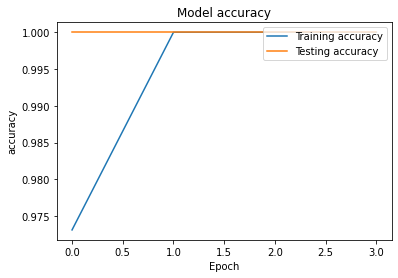

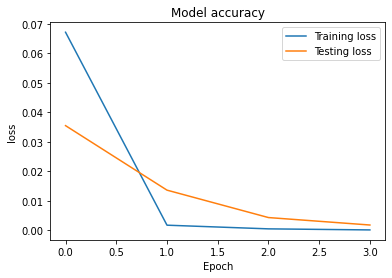

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['Training accuracy','Testing accuracy'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Training loss','Testing loss'], loc='upper right')
plt.show()

In [17]:
pip install h5py

In [19]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 100.00%


In [20]:
predIdxs = model.predict(test_images, batch_size=128)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
#predIdxs = np.argmax(predIdxs, axis=1)